# Lab 12 Tasks - Solutions

In this notebook we will apply basic time series analysis to stock price data for Meta and Amazon, sourced from Yahoo Finance.

In [37]:
from datetime import datetime
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline 

## Task 1

Load the stock price CSV files for both Meta and Amazon into separate Pandas Dat aFrames.

Note: Dates in these files are stored in "day/month/year" format

In [38]:
# create a custom data parser to use for our files
dp = lambda x: datetime.strptime(x, "%d/%m/%Y")

In [39]:
df_meta = pd.read_csv("stock-meta.csv", index_col="date", parse_dates=True, date_parser=dp)
df_meta.head()

/var/folders/4j/3w98pmcj1qb9m2ysc0djsvnc0000gn/T/ipykernel_20196/1419838376.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meta = pd.read_csv("stock-meta.csv", index_col="date", parse_dates=True, date_parser=dp)


,open,high,low,close
date,,,,
2021-01-04,274.779999,275.000000,265.200012,268.940002
2021-01-05,268.290009,272.399994,268.209991,270.970001
2021-01-06,262.000000,267.750000,260.010010,263.309998
2021-01-07,265.899994,271.609985,264.779999,268.739990
2021-01-08,268.309998,268.950012,263.179993,267.570007


In [40]:
df_meta.tail()

,open,high,low,close
date,,,,
2022-06-23,156.270004,159.750000,154.250000,158.750000
2022-06-24,161.729996,170.250000,161.300003,170.160004
2022-06-27,171.320007,171.750000,168.009995,169.490005
2022-06-28,169.899994,171.300003,160.610001,160.679993
2022-06-29,163.570007,166.330002,160.320007,163.940002


In [41]:
df_ms = pd.read_csv("stock-amazon.csv", index_col="date", parse_dates=True, date_parser=dp)
df_ms.head()

/var/folders/4j/3w98pmcj1qb9m2ysc0djsvnc0000gn/T/ipykernel_20196/907778051.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_ms = pd.read_csv("stock-amazon.csv", index_col="date", parse_dates=True, date_parser=dp)


,open,high,low,close
date,,,,
2021-01-04,163.500000,163.600006,157.201004,159.331497
2021-01-05,158.300507,161.169006,158.253006,160.925507
2021-01-06,157.324005,159.875504,156.557999,156.919006
2021-01-07,157.850006,160.427002,157.750000,158.108002
2021-01-08,159.000000,159.531998,157.110001,159.134995


In [42]:
df_ms.tail()

,open,high,low,close
date,,,,
2022-06-23,110.389999,113.000000,107.930000,112.440002
2022-06-24,112.379997,116.709999,111.430000,116.459999
2022-06-27,117.089996,117.980003,112.699997,113.220001
2022-06-28,113.500000,114.849998,107.040001,107.400002
2022-06-29,107.379997,110.989998,106.910004,108.919998


## Task 2

For each of the Data Frames, extract only the **close** stock prices for the year 2021. This should give you two new Pandas Series.

In [43]:
df_meta_closing = df_meta["close"]["2021"]
df_meta_closing.head()

date
2021-01-04    268.940002
2021-01-05    270.970001
2021-01-06    263.309998
2021-01-07    268.739990
2021-01-08    267.570007
Name: close, dtype: float64

In [44]:
df_ms_closing = df_ms["close"]["2021"]
df_ms_closing.head()

date
2021-01-04    159.331497
2021-01-05    160.925507
2021-01-06    156.919006
2021-01-07    158.108002
2021-01-08    159.134995
Name: close, dtype: float64

## Task 3

Create a new time series Data Frame with two columns, one for the Meta 2021 closing prices and one for the Amazon 2021 closing prices.

In [45]:
# stack the two Series vertically as columns
df_combined = pd.concat( [df_meta_closing,df_ms_closing], axis=1 )
# rename the column names
df_combined.columns = ["Meta","Amazon"]
df_combined.head()

,Meta,Amazon
date,,
2021-01-04,268.940002,159.331497
2021-01-05,270.970001,160.925507
2021-01-06,263.309998,156.919006
2021-01-07,268.739990,158.108002
2021-01-08,267.570007,159.134995


## Task 4

Plot the 2021 closing prices for Meta and Amazon, using a 7-day rolling mean.

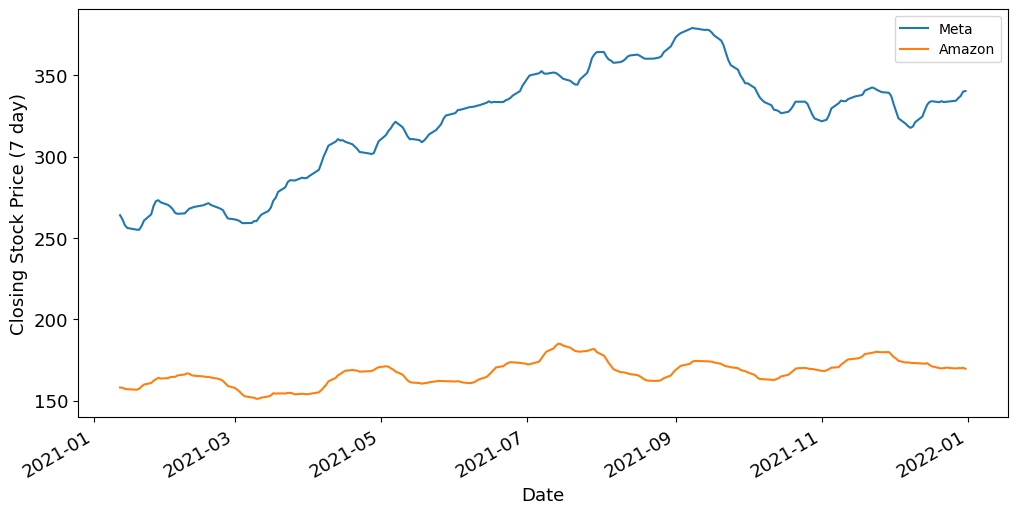

In [46]:
# apply the rolling mean
rm = df_combined.rolling(7).mean()
# create the plot
p = rm.plot(figsize=(12, 6), fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Closing Stock Price (7 day)', fontsize=13)
plt.show()

## Task 5 

Resample the new Data Frame to monthly time windows, and plot the new monthly time series.

In [47]:
# convert from day frequency to month (M) frequency, by averaging values
df_monthly = df_combined.resample("M").mean()

/var/folders/4j/3w98pmcj1qb9m2ysc0djsvnc0000gn/T/ipykernel_20196/2109185927.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_combined.resample("M").mean()


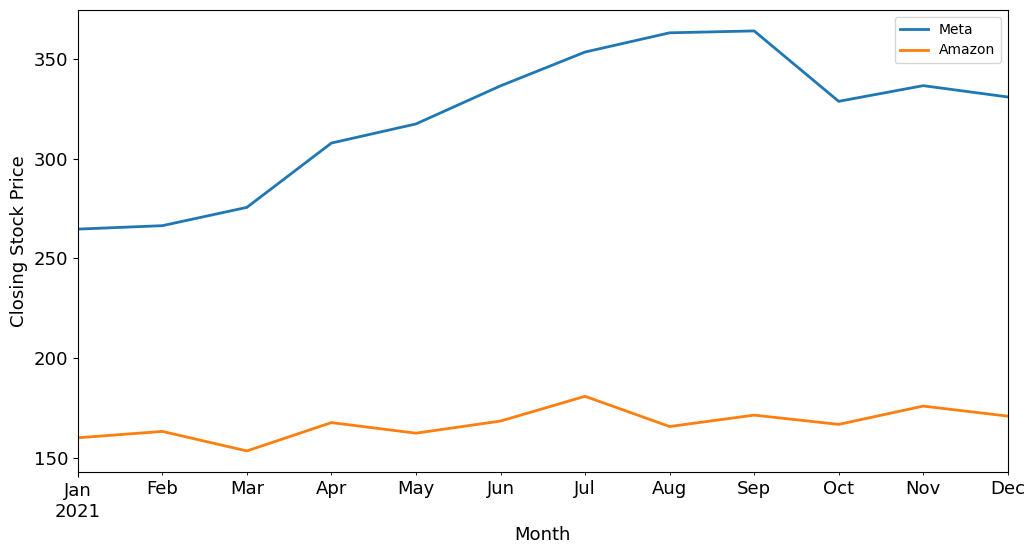

In [48]:
# create the plot
p = df_monthly.plot(figsize=(12, 6), fontsize=13, lw=2)
plt.ylabel('Closing Stock Price', fontsize=13)
plt.xlabel("Month", fontsize=13)
plt.show()